# Un breve ejercicio de Isolation Forest

Es un método para la detección de Outliers, el funcionamiento esencial del algoritmo se basa en hacer cortes aleatorios en los datos para buscar de esa forma aislar los datos que parecen comportarse de manera extraña.

El gran contra que noto para este método es que vos de alguna forma tienes que darle la cantidad de datos anómalos que esperas obtener, lo cual es difícil y de alguna forma es "tantear" que tanto error esperas tener.

In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from numpy import quantile,where, random
import matplotlib.pyplot as plt

-make_blobs crea un conjunto de datos artificiales con forma de clúster (nube de puntos).

-Se generan 200 muestras (n_samples=200) alrededor de un solo centro (centers=1) con una dispersión (cluster_std=0.3).

-center_box=(20,5) define un rango aleatorio para colocar ese centro.

-random.seed(3) fija la semilla para que el experimento sea reproducible.

In [2]:
random.seed(3)
x,_=make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(20,5))

-n_estimators=100: usa 100 árboles para construir el modelo.

-contamination=0.02: se espera que el 2% de los datos sean anomalías (es decir, 4 puntos de 200).

In [3]:
iforest=IsolationForest(n_estimators=100, contamination=0.02)

In [4]:
pred=iforest.fit_predict(x)

fit_predict devuelve:

1 para datos normales,

-1 para anomalías.

In [5]:
pred 

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
anom_index= where(pred==-1)
values= x[anom_index]

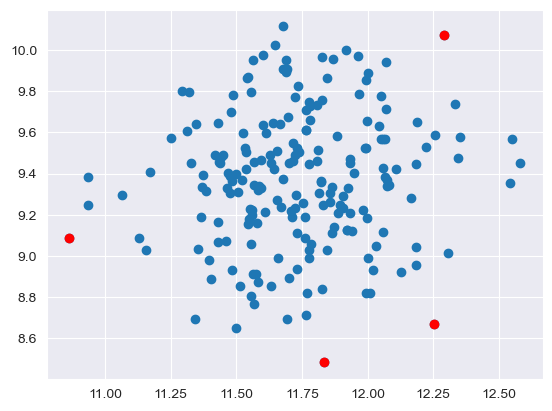

In [7]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(values[:,0],values[:,1],color='r')
plt.show()

In [8]:
anom_index

(array([110, 112, 132, 155]),)

## DeepAR

Para el uso de series temporales he encontrado la herramienta llamada DeepAR. DeepAR es una herramienta de AWS que permite realizar forecasting de series temporales y realizar una mejor detección de datos anómalos para su estudio, amazon utiliza Isolation Forest pero han perfeccionado la técnica para sus modelos de negocio, convirtiendola en una herramienta interesante. Veámos cómo funciona: